### Problem statement

The objective of this project is  
 1. to analyze death rate according to diseases
 2. Apply decision tree algorithm and Random forest algorithm. Compare both accuracy.
 3. Evaluate model and appy randomized searchCV

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


This is the heart failure datasets 

In [3]:
df.shape

(299, 13)

In [4]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

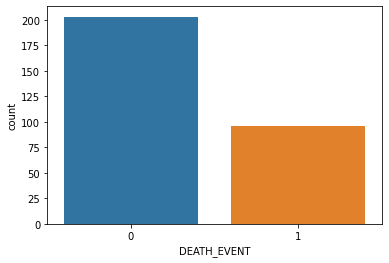

In [5]:
sns.countplot(x='DEATH_EVENT',data=df);

Here, 0 = did not dead and
      1 = Dead
      

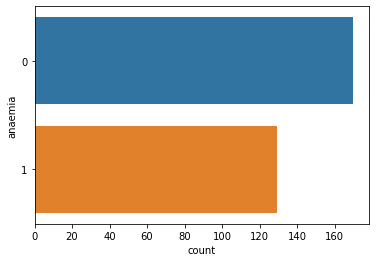

In [6]:
sns.countplot(y='anaemia',data=df);

0 = No anaemia and 1 = anaemia

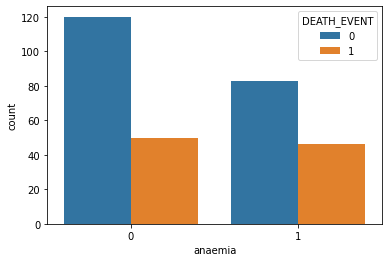

In [7]:
sns.countplot(x='anaemia',data=df,hue='DEATH_EVENT');

The death rate of People who has anaemia is equal to The death rate of People who has not anaemia but the affected people by anaemia is less.
So we can say that the people who has anaemia,he is more likely to die.

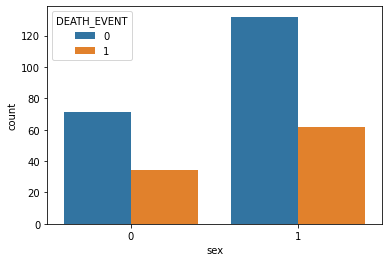

In [8]:
sns.countplot(x='sex',data=df,hue='DEATH_EVENT');

0= Female and 1 = Male.
The death rate of male is high than female

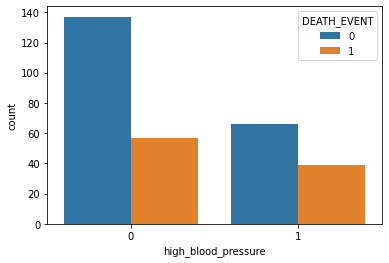

In [9]:
sns.countplot(x='high_blood_pressure',data=df,hue='DEATH_EVENT') ;

 the people who has high_blood_pressure,he is more likely to die.

### Train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = df.drop('DEATH_EVENT',axis=1)
y = df['DEATH_EVENT']

In [12]:
xtrain,xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=1)

In [13]:
xtest

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.80,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.00,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.40,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.70,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.80,134,1,0,194
...,...,...,...,...,...,...,...,...,...,...,...,...
122,60.0,0,96,1,38,0,228000.0,0.75,140,0,0,95
246,55.0,0,2017,0,25,0,314000.0,1.10,138,1,0,214
278,50.0,1,1051,1,30,0,232000.0,0.70,136,0,0,246
251,55.0,0,572,1,35,0,231000.0,0.80,143,0,0,215


In [14]:
ytest

173    0
287    0
51     1
146    0
214    0
      ..
122    0
246    1
278    0
251    0
19     1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

# Evaluate Model

In [18]:
pred = dt.predict(xtest)

In [19]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [20]:
ytest

173    0
287    0
51     1
146    0
214    0
      ..
122    0
246    1
278    0
251    0
19     1
Name: DEATH_EVENT, Length: 90, dtype: int64

In [21]:
accuracy = dt.score(xtest,ytest)
accuracy

0.8111111111111111

In [22]:
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [23]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        64\n           1       0.70      0.62      0.65        26\n\n    accuracy                           0.81        90\n   macro avg       0.77      0.75      0.76        90\nweighted avg       0.81      0.81      0.81        90\n'

In [24]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



In [25]:
confusion_matrix(ytest,pred)

array([[57,  7],
       [10, 16]], dtype=int64)

In [26]:
cm = confusion_matrix(ytest,pred)

<AxesSubplot:>

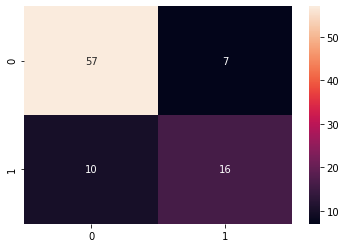

In [27]:
sns.heatmap(cm,annot=True)

In [28]:
tp , fn, fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [29]:
tp

57

In [30]:
fn

7

In [31]:
fp

10

In [32]:
tn

16

# Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
ran = RandomForestClassifier(n_estimators=10) # How much trees

In [35]:
ran.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [36]:
ran.score(xtest,ytest)

0.8666666666666667

In [37]:
prd_ran = ran.predict(xtest)

In [38]:
accuracy = accuracy_score(ytest, prd_ran)
accuracy

0.8666666666666667

We can say , Random forest is better than decision tree for this datasets

# Hyper Parameter Tuning / Optimization Using Randomized searchCV

In [39]:
import numpy as np

In [40]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 200, num = 15)]

max_features = ['auto', 'sqrt','log2']

max_depth = [2,3,4,5,6,7,8,9,10,11,12]

min_samples_split = [2,3,4,5,6,7,8,9,10,11,12]

min_samples_leaf = [2,3,4,5,6,7,8,9,10,11,12]

# Create ids
grids = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(grids)

{'n_estimators': [50, 60, 71, 82, 92, 103, 114, 125, 135, 146, 157, 167, 178, 189, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'criterion': ['entropy', 'gini']}


In [41]:
from sklearn.model_selection import RandomizedSearchCV

In [42]:
rnf = RandomForestClassifier()

In [43]:
rmcv = RandomizedSearchCV(estimator=rnf, param_distributions=grids, n_iter=100, cv=5)#n_iter=(how many times you want to run this model)

In [44]:
rmcv

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [50, 60, 71, 82, 92,
                                                         103, 114, 125, 135,
                                 

In [45]:
rmcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [50, 60, 71, 82, 92,
                                                         103, 114, 125, 135,
                                 

In [46]:
rmcv.best_params_

{'n_estimators': 92,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

In [47]:
rmcv.cv_results_

{'mean_fit_time': array([0.12497015, 0.33535562, 0.19371028, 0.39122753, 0.248352  ,
        0.09997687, 0.09685192, 0.30617809, 0.1624598 , 0.17966323,
        0.18120584, 0.36554089, 0.09997611, 0.24680882, 0.24528656,
        0.12184472, 0.37179065, 0.4637651 , 0.193712  , 0.1780827 ,
        0.16558528, 0.24508963, 0.09685059, 0.27803979, 0.14371576,
        0.18745461, 0.16388836, 0.0999754 , 0.36241488, 0.24056911,
        0.3728178 , 0.13746738, 0.3249248 , 0.1624608 , 0.27316861,
        0.14371514, 0.26556215, 0.40684843, 0.28095775, 0.35506206,
        0.12644963, 0.17323623, 0.1652534 , 0.19539561, 0.10532675,
        0.19642797, 0.23012009, 0.31254306, 0.10579238, 0.16286073,
        0.10179553, 0.13931303, 0.15133977, 0.10305953, 0.32410545,
        0.24564776, 0.19373393, 0.19514685, 0.27692251, 0.12185216,
        0.18433132, 0.30450864, 0.25306482, 0.28118477, 0.27332954,
        0.20619354, 0.37178721, 0.16246104, 0.35449295, 0.24994125,
        0.30617828, 0.20771751,

In [48]:
result = pd.DataFrame(rmcv.cv_results_)

In [49]:
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.124970,0.000003,0.012498,0.006249,60,4,10,auto,9,entropy,"{'n_estimators': 60, 'min_samples_split': 4, '...",0.880952,0.785714,0.785714,0.785714,0.878049,0.823229,0.045955,71
1,0.335356,0.016063,0.031250,0.000015,167,5,9,auto,12,gini,"{'n_estimators': 167, 'min_samples_split': 5, ...",0.857143,0.833333,0.809524,0.761905,0.926829,0.837747,0.054553,31
2,0.193710,0.007661,0.012490,0.006245,92,7,3,log2,12,entropy,"{'n_estimators': 92, 'min_samples_split': 7, '...",0.904762,0.809524,0.785714,0.761905,0.926829,0.837747,0.065852,31
3,0.391228,0.008825,0.031247,0.000012,200,2,7,sqrt,12,entropy,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.880952,0.833333,0.809524,0.785714,0.902439,0.842393,0.043514,24
4,0.248352,0.010382,0.018746,0.006248,125,5,6,log2,10,gini,"{'n_estimators': 125, 'min_samples_split': 5, ...",0.880952,0.809524,0.785714,0.738095,0.951220,0.833101,0.074926,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.340808,0.018562,0.028922,0.002076,167,11,2,sqrt,5,gini,"{'n_estimators': 167, 'min_samples_split': 11,...",0.857143,0.857143,0.785714,0.785714,0.902439,0.837631,0.045502,36
96,0.207442,0.025064,0.016356,0.001954,82,5,2,auto,11,entropy,"{'n_estimators': 82, 'min_samples_split': 5, '...",0.857143,0.809524,0.785714,0.785714,0.926829,0.832985,0.053684,42
97,0.145611,0.013728,0.013958,0.001266,60,5,7,log2,5,gini,"{'n_estimators': 60, 'min_samples_split': 5, '...",0.880952,0.809524,0.785714,0.761905,0.902439,0.828107,0.054485,56
98,0.291211,0.013937,0.020873,0.003252,125,4,4,log2,10,gini,"{'n_estimators': 125, 'min_samples_split': 4, ...",0.880952,0.833333,0.833333,0.785714,0.951220,0.856911,0.055952,1


In [50]:
rmcv.best_score_

0.8569105691056912

In [51]:
rmcv.best_params_

{'n_estimators': 92,
 'min_samples_split': 12,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 7,
 'criterion': 'entropy'}

In [52]:
random_forest = rmcv.best_estimator_

In [53]:
random_forest

RandomForestClassifier(criterion='entropy', max_depth=7, max_features='log2',
                       min_samples_leaf=6, min_samples_split=12,
                       n_estimators=92)

In [54]:
random_forest.score(xtest,ytest)

0.9111111111111111

 We can get better accuracy after tuning